# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [19]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [ ]:
# @@@ 1

df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2

michigan = df[df["STATE"] == "MICHIGAN"]
ohio = df[df["STATE"] == "OHIO"]
if michigan["AVG_MATH_4_SCORE"].mean() > ohio["AVG_MATH_4_SCORE"].mean():
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your chosen test across all states in 2019

In [ ]:
# @@@ 3

twenty_nineteen = df[df["YEAR"] == 2019]
twenty_nineteen_mean = twenty_nineteen["AVG_MATH_4_SCORE"].mean()
print(twenty_nineteen_mean)



239.9433962264151


For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4

df.groupby(["STATE"])["AVG_MATH_4_SCORE"].max()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [102]:
# @@@ 5

# new column for expenditure per student for each state in each year
df["EXPENDITURE_PER_STUDENT"] = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL"]

# average expenditure per student across the years for each state
df.groupby(["STATE"])["EXPENDITURE_PER_STUDENT"].mean()


STATE
ALABAMA                  8.421381
ALASKA                  17.080138
ARIZONA                  6.971674
ARKANSAS                 8.796927
CALIFORNIA              10.049618
COLORADO                 9.331937
CONNECTICUT             14.276362
DELAWARE                12.617794
DISTRICT_OF_COLUMBIA    14.062380
DODEA                         NaN
FLORIDA                  9.217195
GEORGIA                  9.198526
HAWAII                  10.612389
IDAHO                    6.546958
ILLINOIS                12.185049
INDIANA                  9.810353
IOWA                    10.340114
KANSAS                  10.239193
KENTUCKY                 8.702852
LOUISIANA                9.261906
MAINE                   11.806347
MARYLAND                12.401227
MASSACHUSETTS           13.520292
MICHIGAN                10.816211
MINNESOTA               11.272281
MISSISSIPPI              7.558907
MISSOURI                 9.353588
MONTANA                 10.118282
NATIONAL                      NaN
NEBRASKA

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

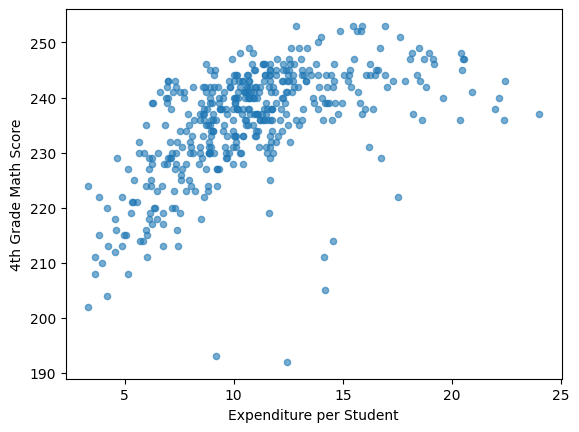

In [75]:
# @@@ 6

# relationship between 4th grade math scores & the state's expenditure per student (predictor 1)
df.plot.scatter(x="EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", alpha=0.6)
plt.xlabel("Expenditure per Student")
plt.ylabel("4th Grade Math Score")

# pretty clear positive correlation!

**<There's a pretty clear positive correlation between expenditure per student and the math scores of 4th grade students.>**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

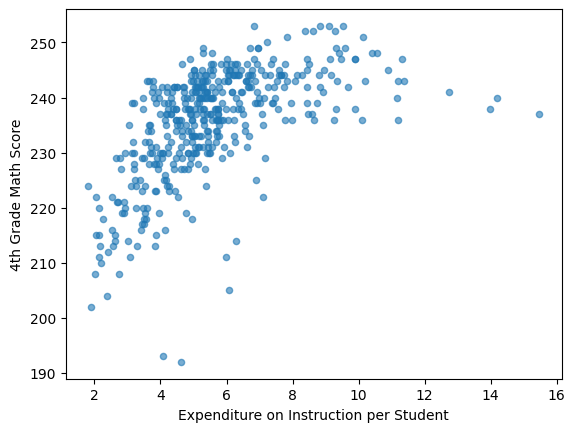

In [62]:
# @@@ 7

# new column for instruction expenditure per student
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL"]

# relationship between 4th grade math scores & the state's expenditure on instruction per student (predictor 2)
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", alpha=0.6)
plt.xlabel("Expenditure on Instruction per Student")
plt.ylabel("4th Grade Math Score")

# also a strong positive correlation!

**<There is also a strong correlation between expenditure on instruction per student and the math scores of fourth graders.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [63]:
from sklearn.model_selection import train_test_split

In [86]:
# @@@ 8

X = df[["EXPENDITURE_PER_STUDENT","INSTRUCTION_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]["AVG_MATH_4_SCORE"]

In [87]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [88]:
# @@@ 10

from sklearn.linear_model import LinearRegression


In [89]:
# @@@ 11
# create your model here
model = LinearRegression()

In [90]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [91]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [95]:
# @@@ 12

# how well linear model fits my data
model.score(X_test, y_test)

# mean error
np.mean(model.predict(X_test)-y_test)

np.float64(1.6007511055240786)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

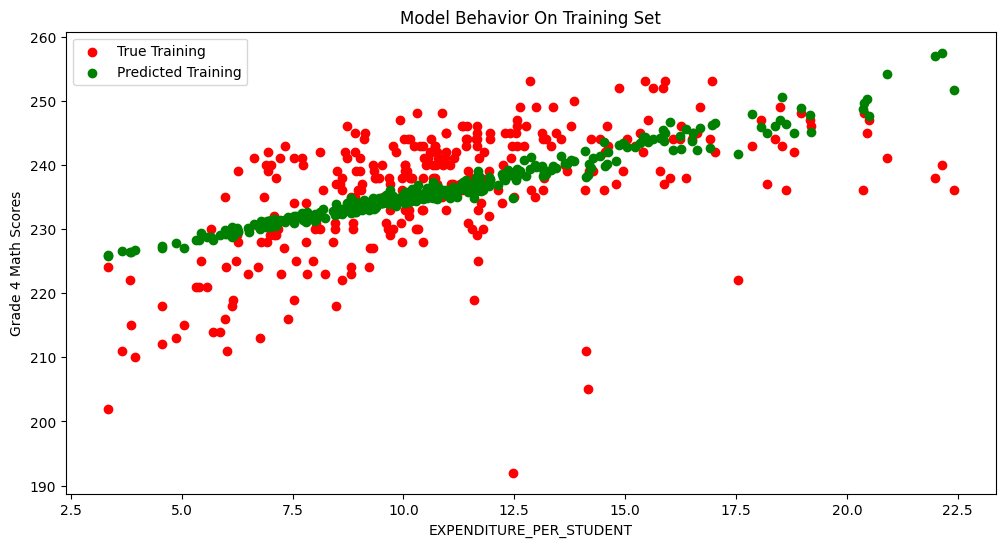

In [103]:
# @@@ 13

col_name = "EXPENDITURE_PER_STUDENT"


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("Grade 4 Math Scores")
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

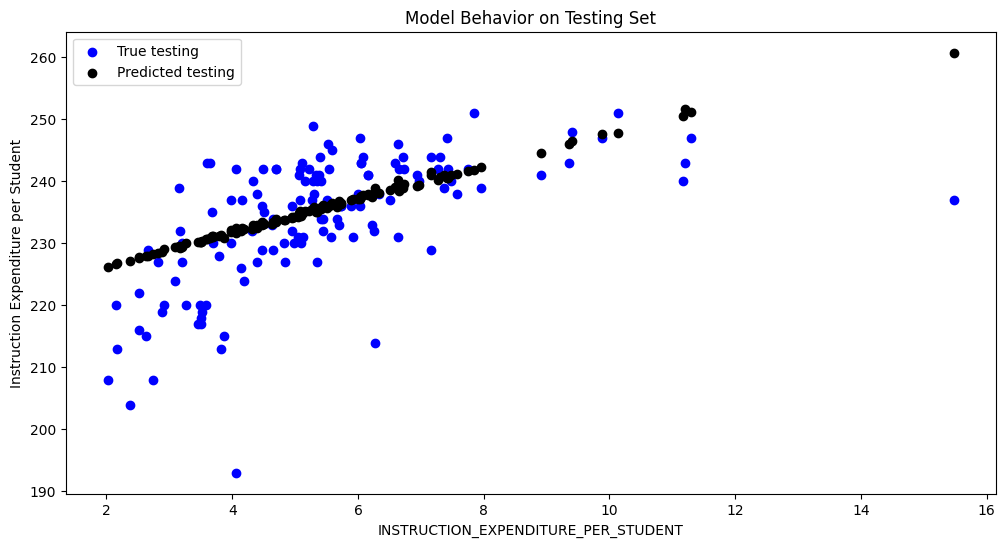

In [101]:
# @@@ 14


col_name = "INSTRUCTION_EXPENDITURE_PER_STUDENT"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Instruction Expenditure per Student")
plt.title("Model Behavior on Testing Set")